In [29]:
!pip -q install pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fitter 1.6.0 requires matplotlib>=3.7.2, but you have matplotlib 3.6.0 which is incompatible.
fitter 1.6.0 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.5.3 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.3 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
tensorflowjs 4.13.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.5.1 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 w

In [30]:
!pip -q install --upgrade scipy

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fitter 1.6.0 requires matplotlib>=3.7.2, but you have matplotlib 3.6.0 which is incompatible.
fitter 1.6.0 requires pandas<3.0.0,>=2.0.3, but you have pandas 1.5.3 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.24.3 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.3 which is incompatible.
tensorflowjs 4.13.0 requires packaging~=23.1, but you have packaging 21.3 which is incomp

In [31]:
!pip -q install --upgrade yellowbrick

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import warnings
warnings.filterwarnings("ignore")

In [33]:
data = pd.read_csv("itos.csv")

In [34]:
pd.options.display.max_columns = None

In [35]:
data.head()

,record_id,Measurement_timestamp,Vehicle_speed_sensor,Vibration,Engine_Load,Engine_Coolant_Temp,Intake_Manifold_Pressure,Engine_RPM,Speed_OBD,Intake_Air_Temp,Mass_Air_Flow_Rate,Throttle_Pos_Manifold,Voltage_Control_Module,Ambient_air_temp,Accel_Pedal_Pos_D,Engine_Oil_Temp,Litres_Per_100km_Inst,CO2_in_g_per_km_Inst,Maintenance_flag
0,1,22FEB16:16:01:07,88,246.240538,41.960785,90,181,1665.5,88,10,43.72,80.00000,14.18,6,42.352943,87,10.849181,286.960630,0
1,2,22FEB16:16:01:08,88,246.240538,2.745098,90,126,1665.5,88,10,28.19,79.60784,14.20,6,14.901961,87,3.278558,86.717800,0
2,3,22FEB16:16:01:09,87,246.296167,2.745098,90,126,1359.0,87,10,22.55,79.60784,14.20,6,29.411766,88,0.000000,0.000000,0
3,4,22FEB16:16:01:10,86,246.351796,9.411765,90,126,1327.0,86,10,21.97,76.07843,14.22,6,23.921570,88,0.000000,0.000000,0
4,5,22FEB16:16:01:11,86,246.351796,9.411765,90,126,1302.5,86,10,21.63,79.60784,14.14,6,42.352943,88,0.000000,15.992998,0


In [36]:
data.columns

Index(['record_id', 'Measurement_timestamp', 'Vehicle_speed_sensor',
       'Vibration', 'Engine_Load', 'Engine_Coolant_Temp',
       'Intake_Manifold_Pressure', 'Engine_RPM', 'Speed_OBD',
       'Intake_Air_Temp', 'Mass_Air_Flow_Rate', 'Throttle_Pos_Manifold',
       'Voltage_Control_Module', 'Ambient_air_temp', 'Accel_Pedal_Pos_D',
       'Engine_Oil_Temp', 'Litres_Per_100km_Inst', 'CO2_in_g_per_km_Inst',
       'Maintenance_flag'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9398 entries, 0 to 9397
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   record_id                 9398 non-null   int64  
 1   Measurement_timestamp     9398 non-null   object 
 2   Vehicle_speed_sensor      9398 non-null   int64  
 3   Vibration                 9398 non-null   float64
 4   Engine_Load               9398 non-null   float64
 5   Engine_Coolant_Temp       9398 non-null   int64  
 6   Intake_Manifold_Pressure  9398 non-null   int64  
 7   Engine_RPM                9398 non-null   float64
 8   Speed_OBD                 9398 non-null   int64  
 9   Intake_Air_Temp           9398 non-null   int64  
 10  Mass_Air_Flow_Rate        9398 non-null   float64
 11  Throttle_Pos_Manifold     9398 non-null   float64
 12  Voltage_Control_Module    9398 non-null   float64
 13  Ambient_air_temp          9398 non-null   int64  
 14  Accel_Pe

In [38]:
np.round(data[2:-1].describe().T,3)

,count,mean,std,min,25%,50%,75%,max
record_id,9395.0,4136.144,2373.448,3.000,2238.500,4134.000,6106.500,8344.000
Vehicle_speed_sensor,9395.0,82.567,37.792,0.000,53.000,90.000,108.000,186.000
Vibration,9395.0,246.543,2.102,240.789,245.128,246.129,248.188,251.136
Engine_Load,9395.0,36.838,28.558,0.000,12.941,34.902,56.078,99.608
Engine_Coolant_Temp,9395.0,87.832,2.263,79.000,87.000,88.000,89.000,94.000
Intake_Manifold_Pressure,9395.0,120.867,21.205,102.000,110.000,114.000,121.000,255.000
Engine_RPM,9395.0,1320.988,275.062,669.000,1176.000,1312.000,1449.000,2597.000
Speed_OBD,9395.0,82.567,37.792,0.000,53.000,90.000,108.000,186.000
Intake_Air_Temp,9395.0,10.401,2.303,6.000,9.000,10.000,11.000,18.000
Mass_Air_Flow_Rate,9395.0,25.319,11.098,5.860,19.800,23.190,27.360,117.910


<Axes: >

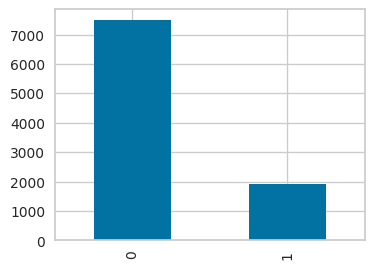

In [39]:
data['Maintenance_flag'].value_counts().plot.bar(figsize = (4,3 ))

In [40]:
num_cols = data.columns[2:-1]

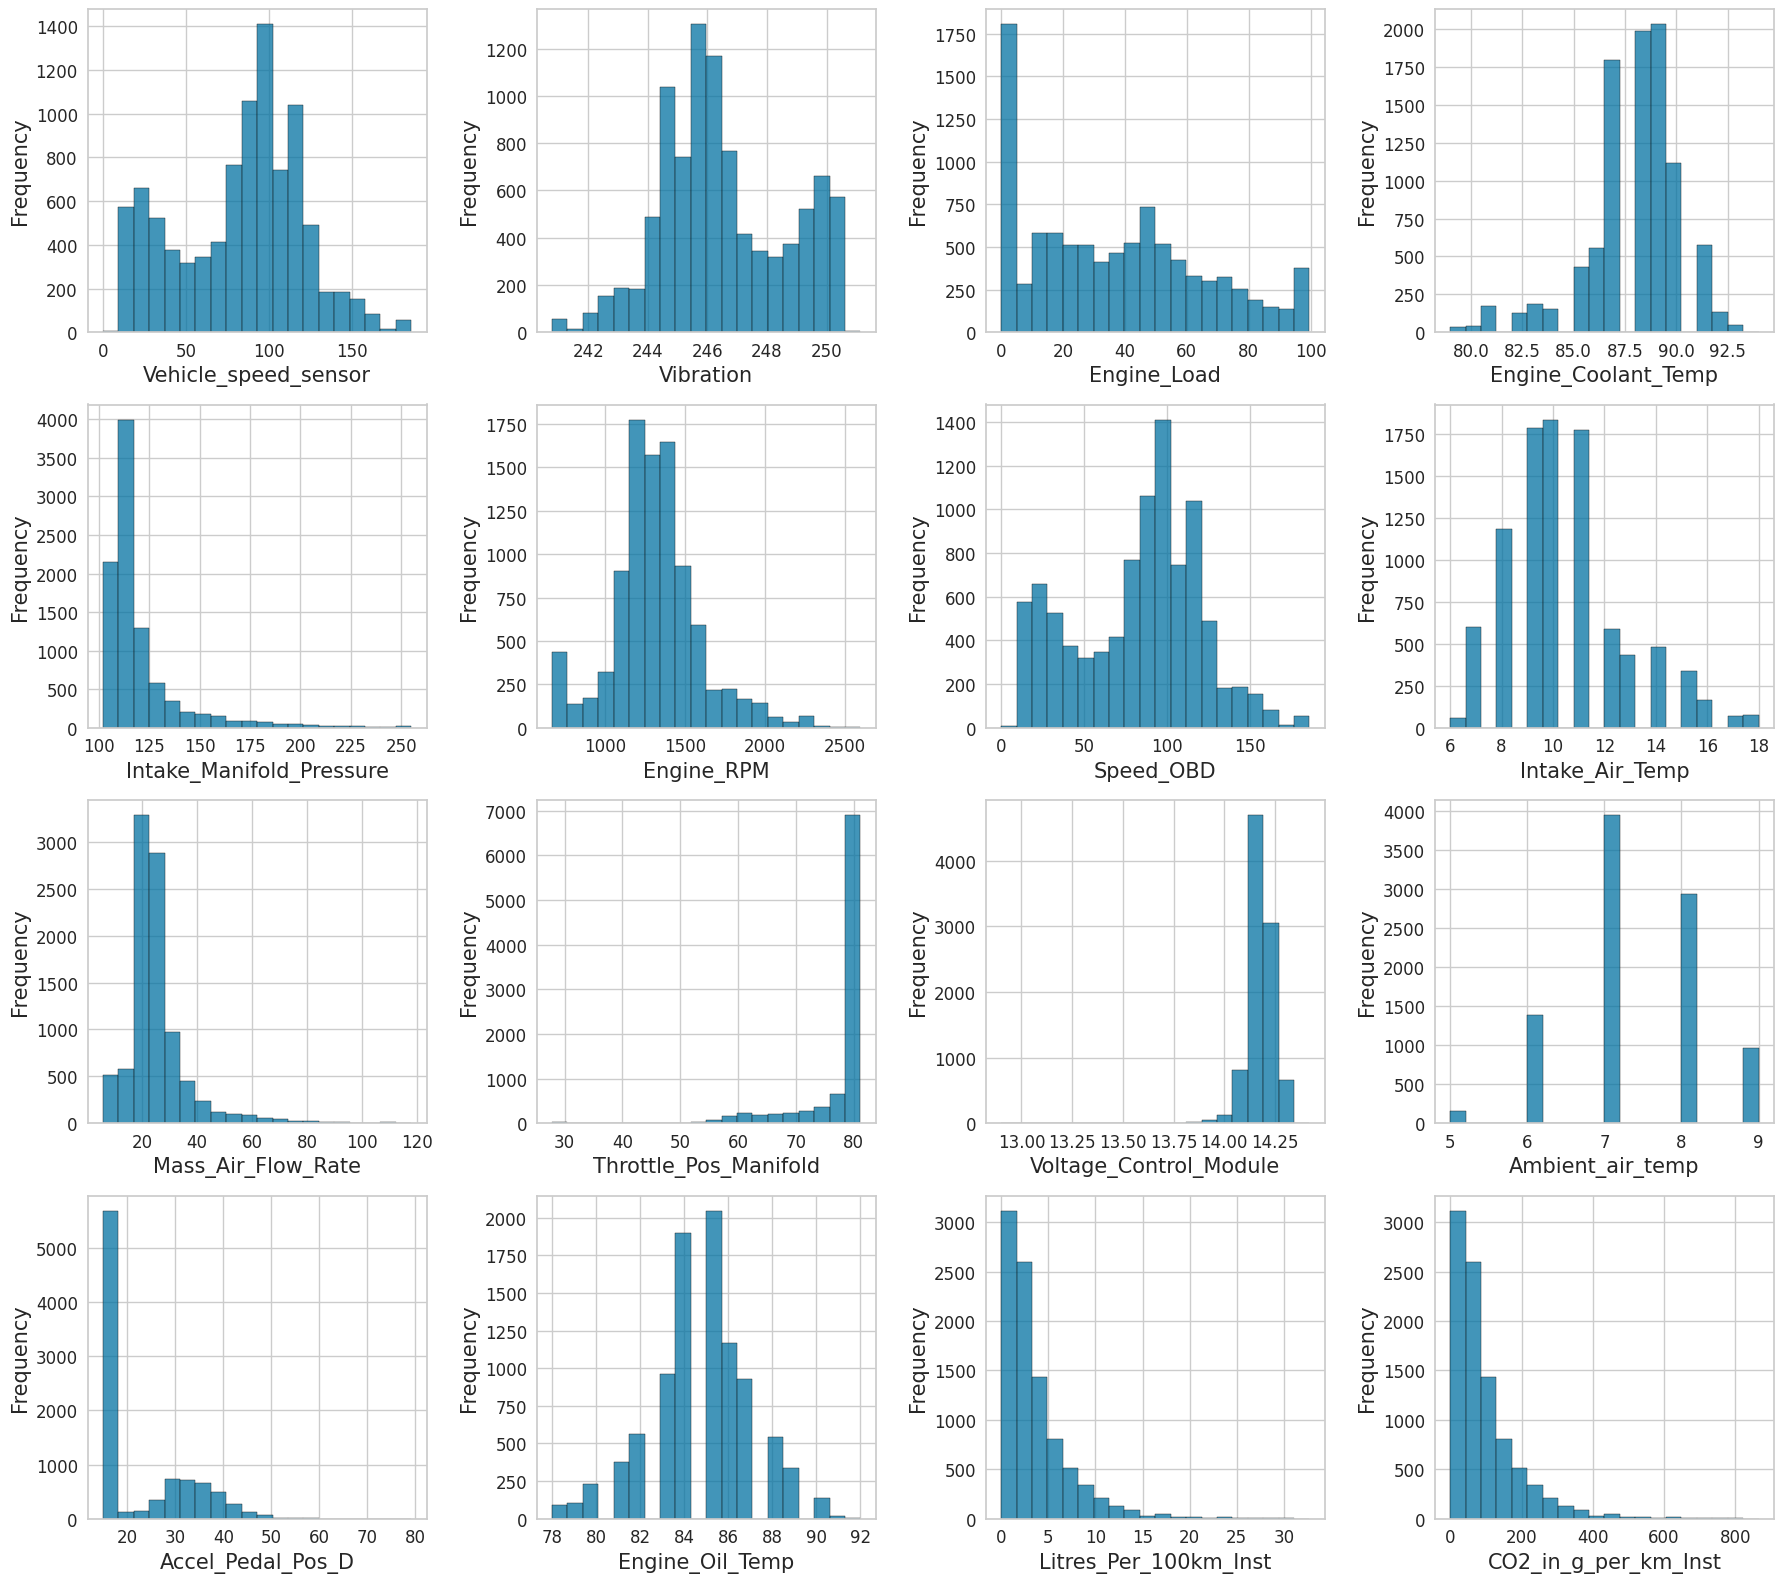

In [41]:
plt.figure(figsize = (18, 16))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.histplot(data, x = col, bins = 20, edgecolor = 'k')
    plt.xlabel(col, fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig("histogram.png")
plt.show()

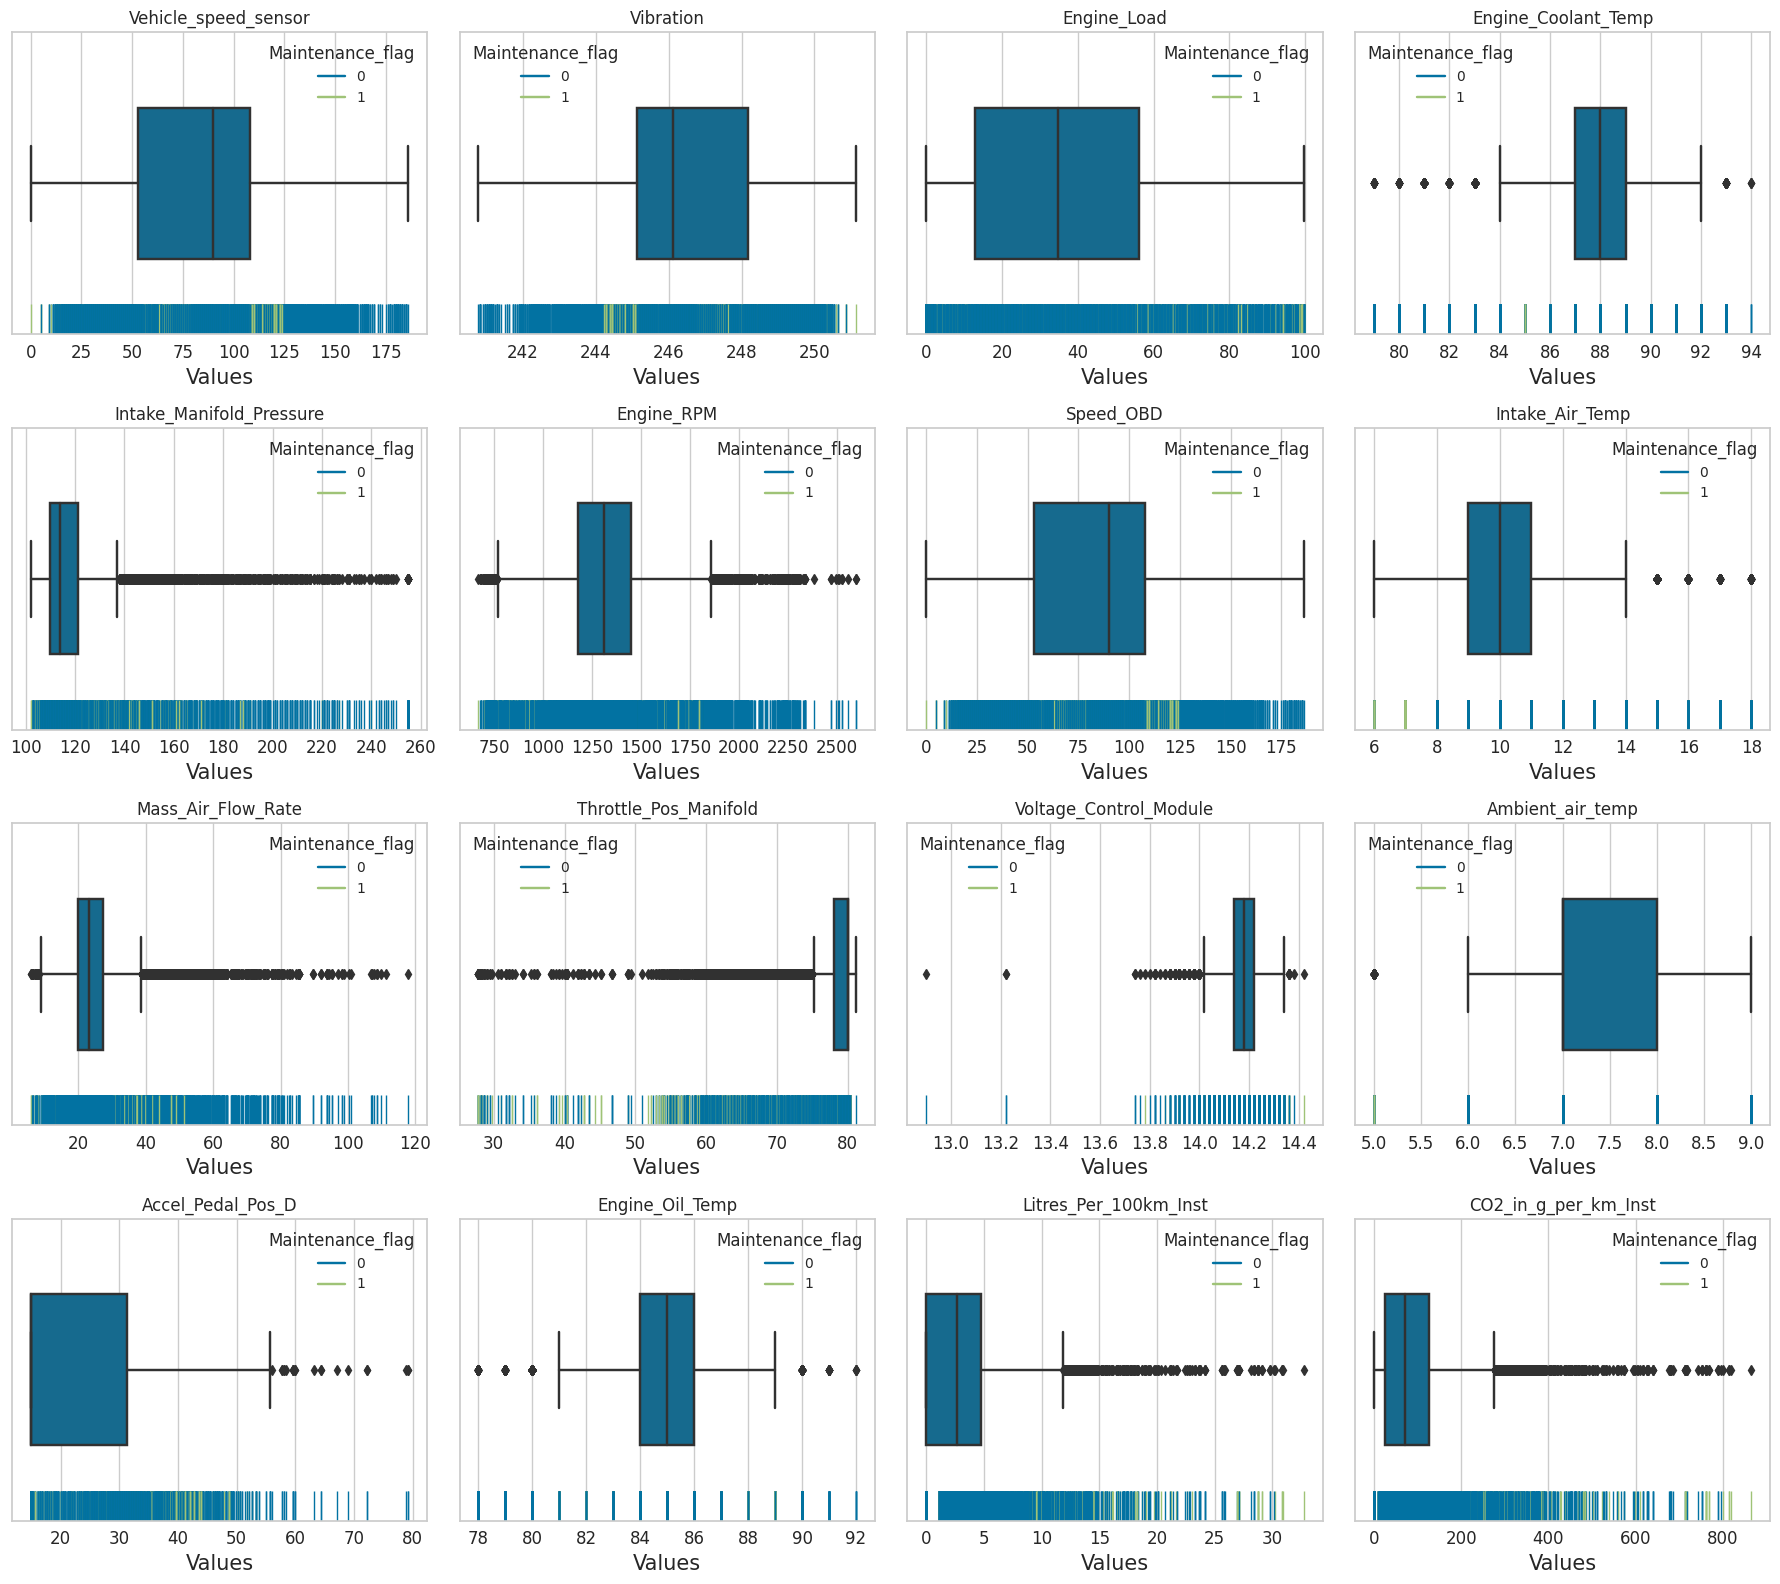

In [42]:
plt.figure(figsize = (18, 16))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data, x = col, width = 0.5)
    sns.rugplot(data, x= col, hue = 'Maintenance_flag', height=0.1)
    plt.xlabel("Values", fontsize = 15)
    plt.title(col)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

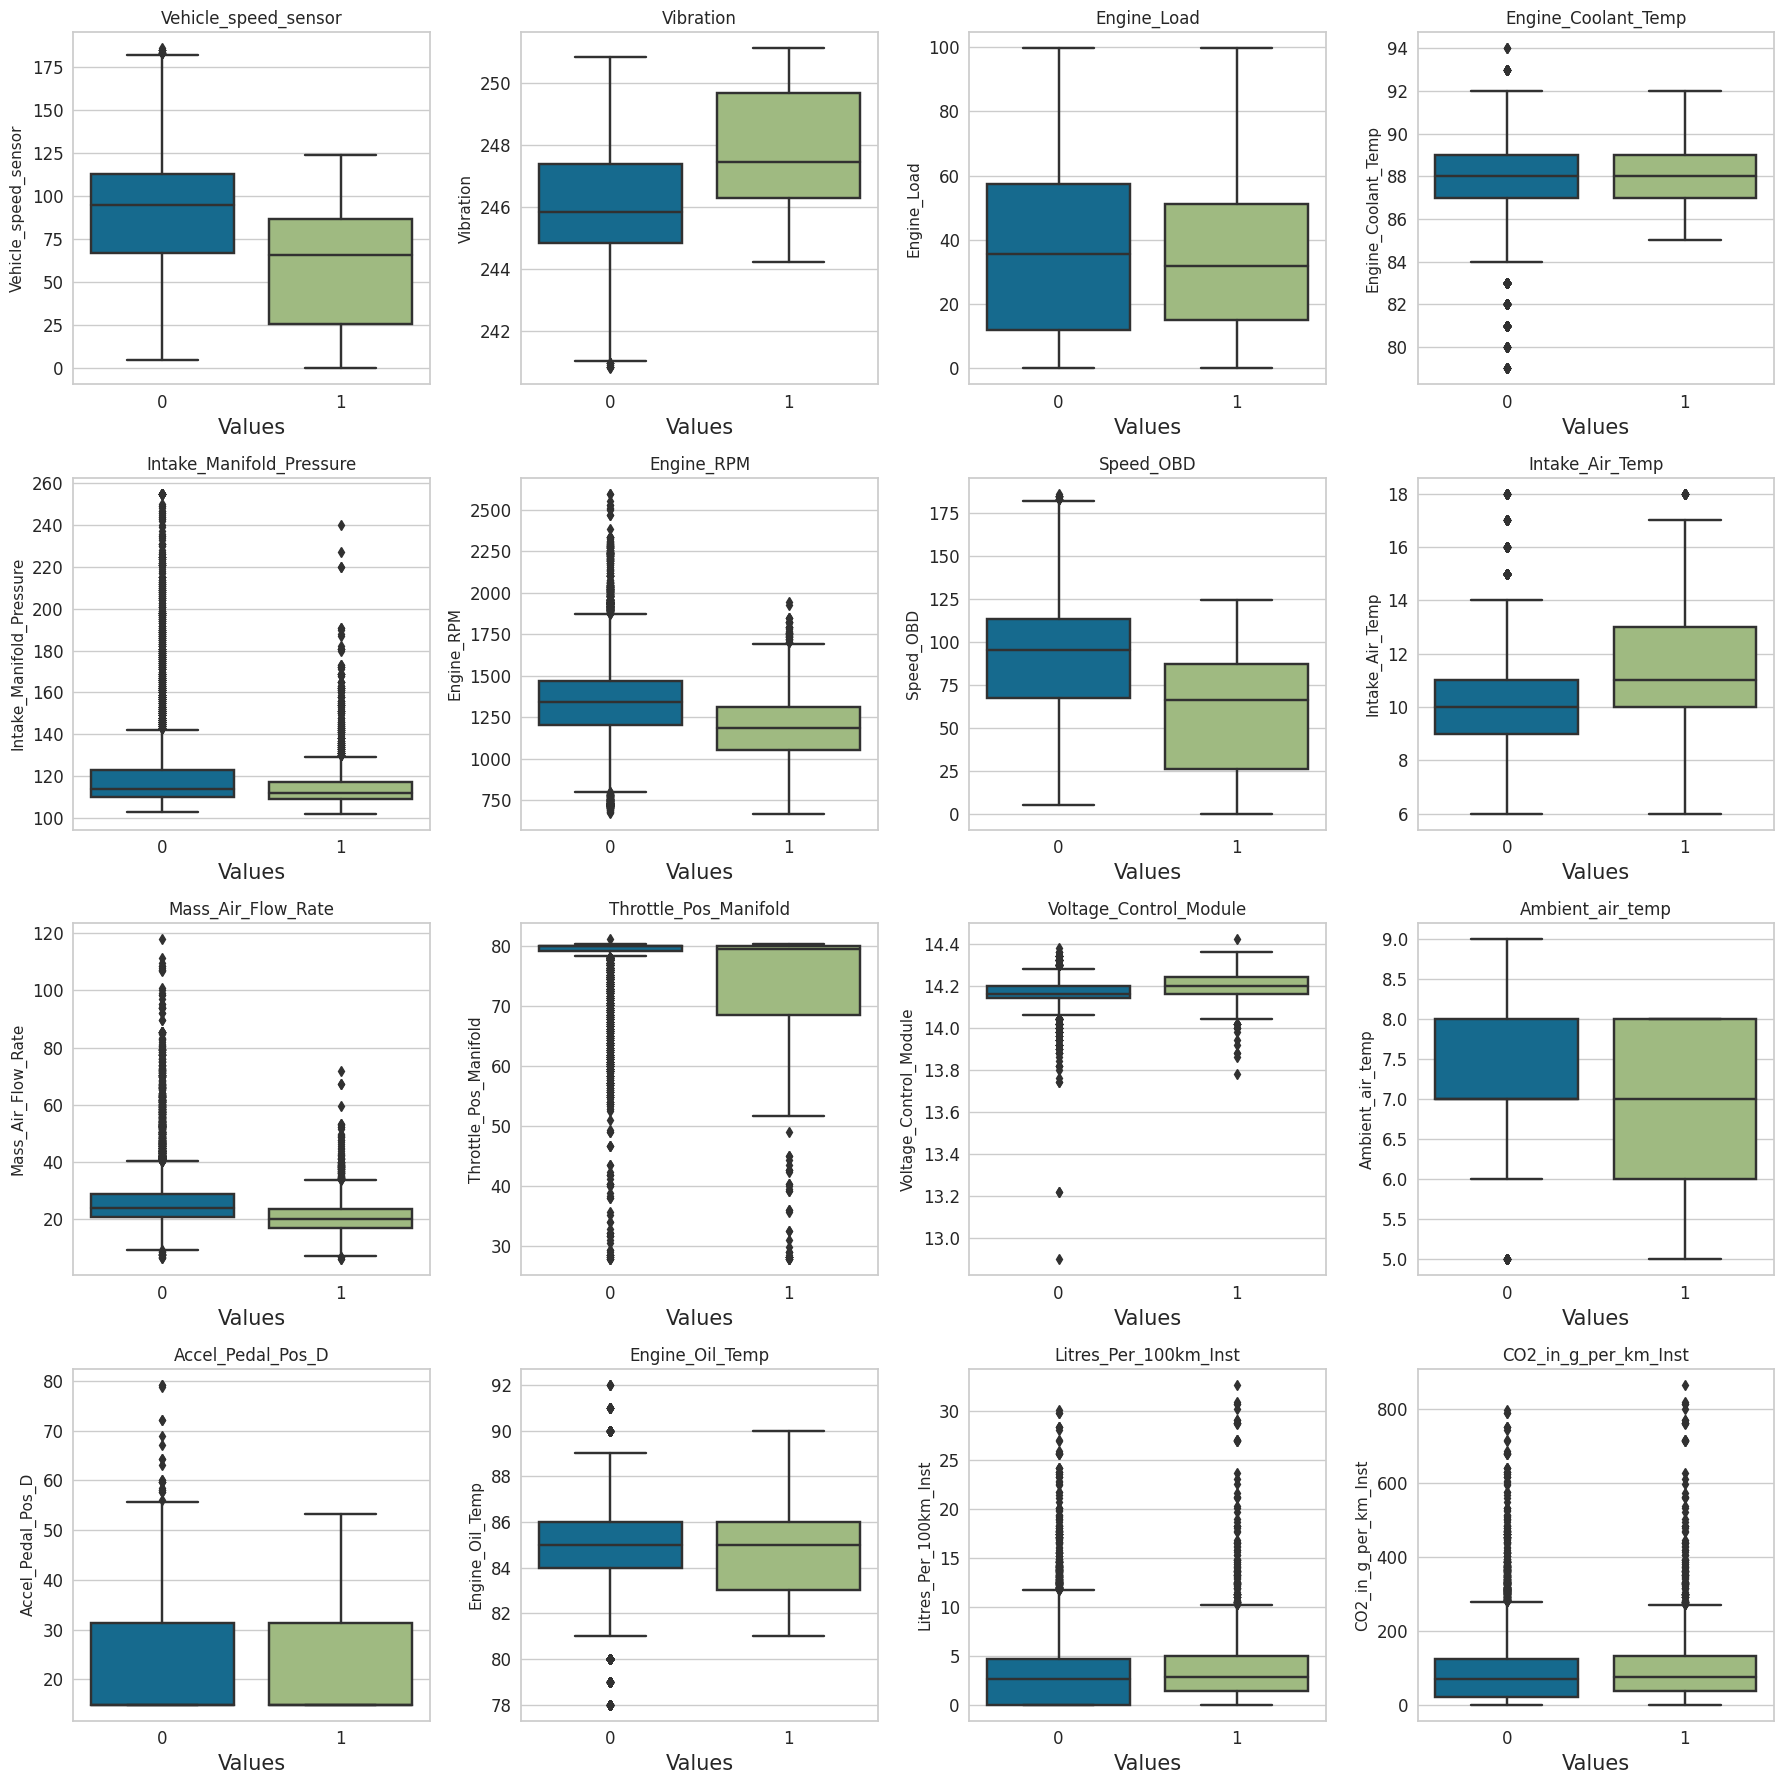

In [43]:
plt.figure(figsize = (18, 18))
for i, col in enumerate(num_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data, x = 'Maintenance_flag', y= col)
    plt.xlabel("Values", fontsize = 15)
    plt.title(col)
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
plt.tight_layout()
plt.savefig("box.png")
plt.show()

In [44]:
data.drop(['record_id', 'Measurement_timestamp'], axis = 1, inplace = True)

# Training Model

In [45]:
from pycaret.classification import *

In [46]:
s = setup(data, target = 'Maintenance_flag', session_id=101, data_split_stratify=True)

,Description,Value
0,Session id,101
1,Target,Maintenance_flag
2,Target type,Binary
3,Original data shape,"(9398, 17)"
4,Transformed data shape,"(9398, 17)"
5,Transformed train set shape,"(6578, 17)"
6,Transformed test set shape,"(2820, 17)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [47]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8714,0.9451,0.6640,0.6926,0.6777,0.5974,0.5978,0.8370
rf,Random Forest Classifier,0.8679,0.9400,0.6401,0.6904,0.6639,0.5819,0.5828,1.3830
dt,Decision Tree Classifier,0.8642,0.7934,0.6736,0.6651,0.6692,0.5838,0.5839,0.0950
xgboost,Extreme Gradient Boosting,0.8638,0.9277,0.6364,0.6774,0.6557,0.5709,0.5718,0.3390
lightgbm,Light Gradient Boosting Machine,0.8559,0.9236,0.6386,0.6502,0.6439,0.5536,0.5540,0.3160
catboost,CatBoost Classifier,0.8530,0.9226,0.6059,0.6501,0.6270,0.5356,0.5363,4.6700
gbc,Gradient Boosting Classifier,0.8270,0.8946,0.4568,0.5994,0.5180,0.4150,0.4210,1.6980
ada,Ada Boost Classifier,0.8088,0.8707,0.3704,0.5475,0.4411,0.3310,0.3406,0.5850
lda,Linear Discriminant Analysis,0.8034,0.8054,0.2549,0.5400,0.3457,0.2473,0.2717,0.0580
ridge,Ridge Classifier,0.8016,0.0000,0.1558,0.5516,0.2424,0.1675,0.2126,0.0450


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

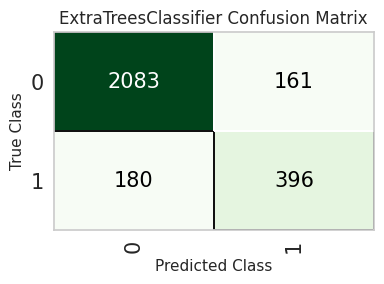

In [48]:
plt.figure(figsize = (4,3))
plot_model(best_model, plot = 'confusion_matrix')

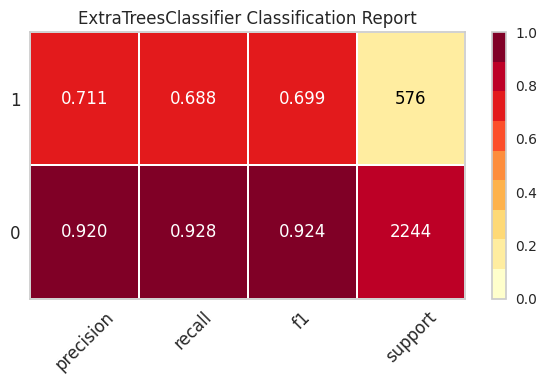

<Figure size 800x550 with 0 Axes>

In [55]:
plt.figure(figsize = (6,4))
plot_model(best_model, plot = 'class_report')
plt.savefig("classification.png")

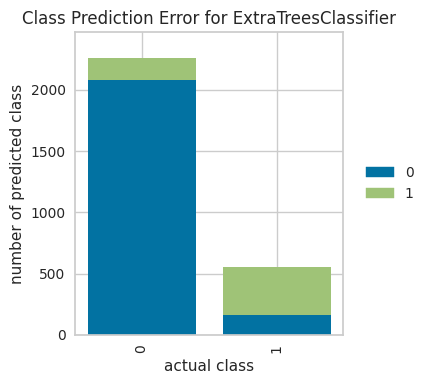

In [56]:
plt.figure(figsize = (5, 4))
plot_model(best_model, plot = 'error')

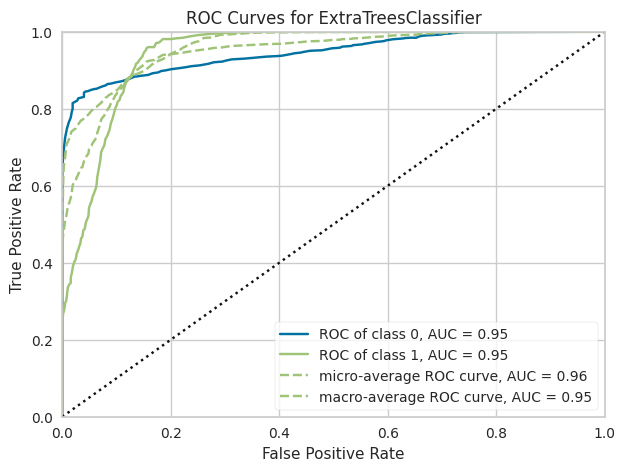

In [51]:
plt.figure(figsize = (7,5))
plot_model(best_model, plot = 'auc')

<Figure size 600x700 with 0 Axes>

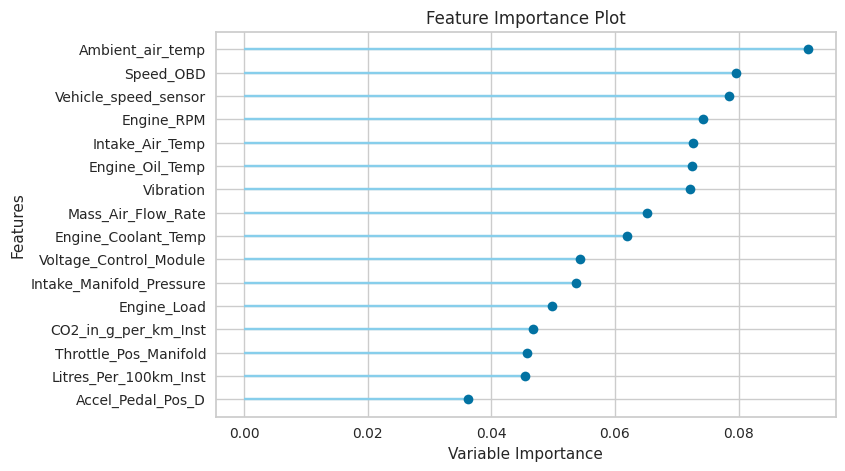

In [58]:
plt.figure(figsize = (6,7))
plot_model(best_model, plot = 'feature_all')

In [53]:
save_model(best_model, 'itos')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Vehicle_speed_sensor',
                                              'Vibration', 'Engine_Load',
                                              'Engine_Coolant_Temp',
                                              'Intake_Manifold_Pressure',
                                              'Engine_RPM', 'Speed_OBD',
                                              'Intake_Air_Temp',
                                              'Mass_Air_Flow_Rate',
                                              'Throttle_Pos_Manifold',
                                              'Voltage_Control_Module',
                                              'Ambient_air_temp',
                                              'Accel_Pedal_...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                  

In [54]:
import joblib
load_model = joblib.load("/kaggle/working/itos.pkl")